In [1]:
!pip install "numpy>=1.24,<2.0"

In [8]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl.metadata (4.6 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl (331.7 MB)
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 3.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.1 MB/s eta 0:00:00

  Attempting uninstall: protobuf

    Found existing installation: protobuf 3.20.3

    Uninstalling protobuf-3.20.3:

   ---------------------------------------- 0/5 [protobuf]
   ---------------------------------------- 0/5 [protobuf]
   ---------------------------------------- 0/5 [protobuf]
   ---------------------------------------- 0/5 [protobuf]
   ---------------------------------------- 0/5 [protobuf]
   -------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 3.12.0 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 6.33.4 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.20.0 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf<4.22,>=4.21.6; python_version < "3.11", but you have protobuf 6.33.4 which is incompatible.


In [9]:
!pip install "numpy>=1.24,<2.0"

In [10]:
!pip install ctgan sdv

In [2]:
import pandas as pd
import numpy as np
from ctgan import CTGAN

print("✅ All good! Libraries loaded!")
print(f"   numpy version: {np.__version__}")

✅ All good! Libraries loaded!
   numpy version: 1.26.4


In [43]:
# Create sample sales data
import pandas as pd
import numpy as np

np.random.seed(42)  # For reproducibility
n_samples = 2000

data = {
    'marketing_spend': np.random.uniform(100, 5000, n_samples),
    'temperature': np.random.uniform(10, 35, n_samples),
    'is_holiday': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'day_of_week': np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], n_samples),
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], n_samples),
}

# Create target variable (sales) with some correlation
data['sales'] = (
    data['marketing_spend'] * 0.8 + 
    data['temperature'] * 50 +
    data['is_holiday'] * 2000 +
    np.random.normal(0, 500, n_samples)
)

df = pd.DataFrame(data)

print(f"✅ Dataset created!")
print(f"   Shape: {df.shape}")
print(f"\n📊 First 5 rows:")
df.head()

✅ Dataset created!
   Shape: (2000, 6)

📊 First 5 rows:


,marketing_spend,temperature,is_holiday,day_of_week,product_category,sales
0,1935.246582,16.542642,0,Mon,Books,1733.135853
1,4758.500101,16.174470,0,Mon,Food,5353.463155
2,3686.770315,32.656365,0,Wed,Books,4827.957233
3,3033.426573,16.238655,0,Fri,Clothing,3124.133492
4,864.491338,16.798743,0,Fri,Books,963.013787


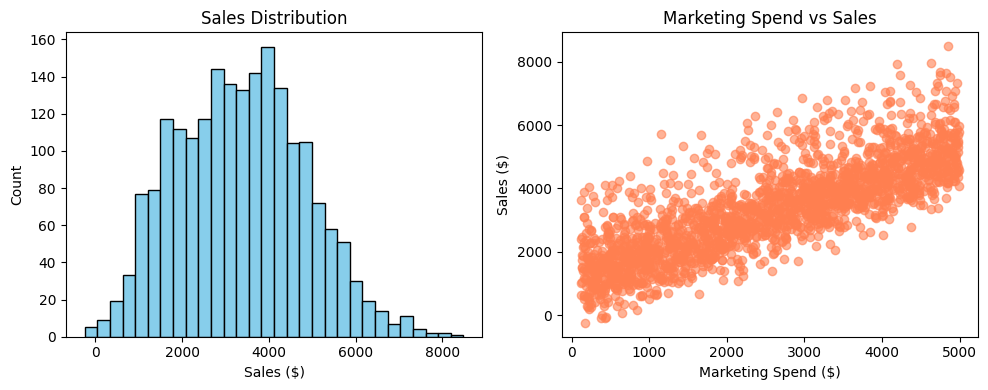

✅ Visualization complete!


In [44]:
import matplotlib.pyplot as plt

# Quick visualization
plt.figure(figsize=(10, 4))

# Plot 1: Sales distribution
plt.subplot(1, 2, 1)
plt.hist(df['sales'], bins=30, edgecolor='black', color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales ($)')
plt.ylabel('Count')

# Plot 2: Marketing spend vs Sales
plt.subplot(1, 2, 2)
plt.scatter(df['marketing_spend'], df['sales'], alpha=0.6, color='coral')
plt.title('Marketing Spend vs Sales')
plt.xlabel('Marketing Spend ($)')
plt.ylabel('Sales ($)')

plt.tight_layout()
plt.show()

print("✅ Visualization complete!")

In [45]:
from ctgan import CTGAN

# Initialize the GAN
ctgan = CTGAN(
    epochs=1000,        # Start small for testing
    batch_size=50,
    verbose=True
)

print("🧠 CTGAN initialized!")
print(f"   Epochs: 1000 (fast for testing)")
print(f"   Batch size: 50")
print("\n💡 TIP: For production, use epochs=100-300")

🧠 CTGAN initialized!
   Epochs: 1000 (fast for testing)
   Batch size: 50

💡 TIP: For production, use epochs=100-300


In [46]:
print("🔥 Starting CTGAN training...")
print(f"   Training samples: {len(df)}")
print(f"   Discrete columns: {discrete_columns}")
print("\n⏳ This will take 1-2 minutes...\n")

print("🔥 Training CTGAN with 100 epochs...")
print("⏳ This will take 5-10 minutes...\n")

ctgan.fit(df, discrete_columns=['day_of_week', 'product_category', 'is_holiday'])

print("\n✅ CTGAN training complete!")
print("🎉 Model is now fine-tuned on your data!")

🔥 Starting CTGAN training...
   Training samples: 2000
   Discrete columns: ['day_of_week', 'product_category', 'is_holiday']

⏳ This will take 1-2 minutes...

🔥 Training CTGAN with 100 epochs...
⏳ This will take 5-10 minutes...



Gen. (-0.12) | Discrim. (-0.75): 100%|█████████████████████████████████████████████| 1000/1000 [13:33<00:00,  1.23it/s]


✅ CTGAN training complete!
🎉 Model is now fine-tuned on your data!


In [47]:
# Generate 500 synthetic rows
n_synthetic = 500

print(f"🎨 Generating {n_synthetic} synthetic samples...")
synthetic_df = ctgan.sample(n_synthetic)

print(f"✅ Generated {len(synthetic_df)} rows!")
print(f"\n📊 Synthetic data preview:")
synthetic_df.head()

🎨 Generating 500 synthetic samples...
✅ Generated 500 rows!

📊 Synthetic data preview:


,marketing_spend,temperature,is_holiday,day_of_week,product_category,sales
0,3102.625713,28.965280,0,Wed,Clothing,2338.625270
1,3616.926556,35.880633,1,Wed,Clothing,7547.184849
2,2695.754088,23.354161,1,Mon,Books,4939.207773
3,2243.606244,33.942404,0,Sat,Books,3694.825005
4,4253.418571,32.828159,0,Sat,Food,6221.815700


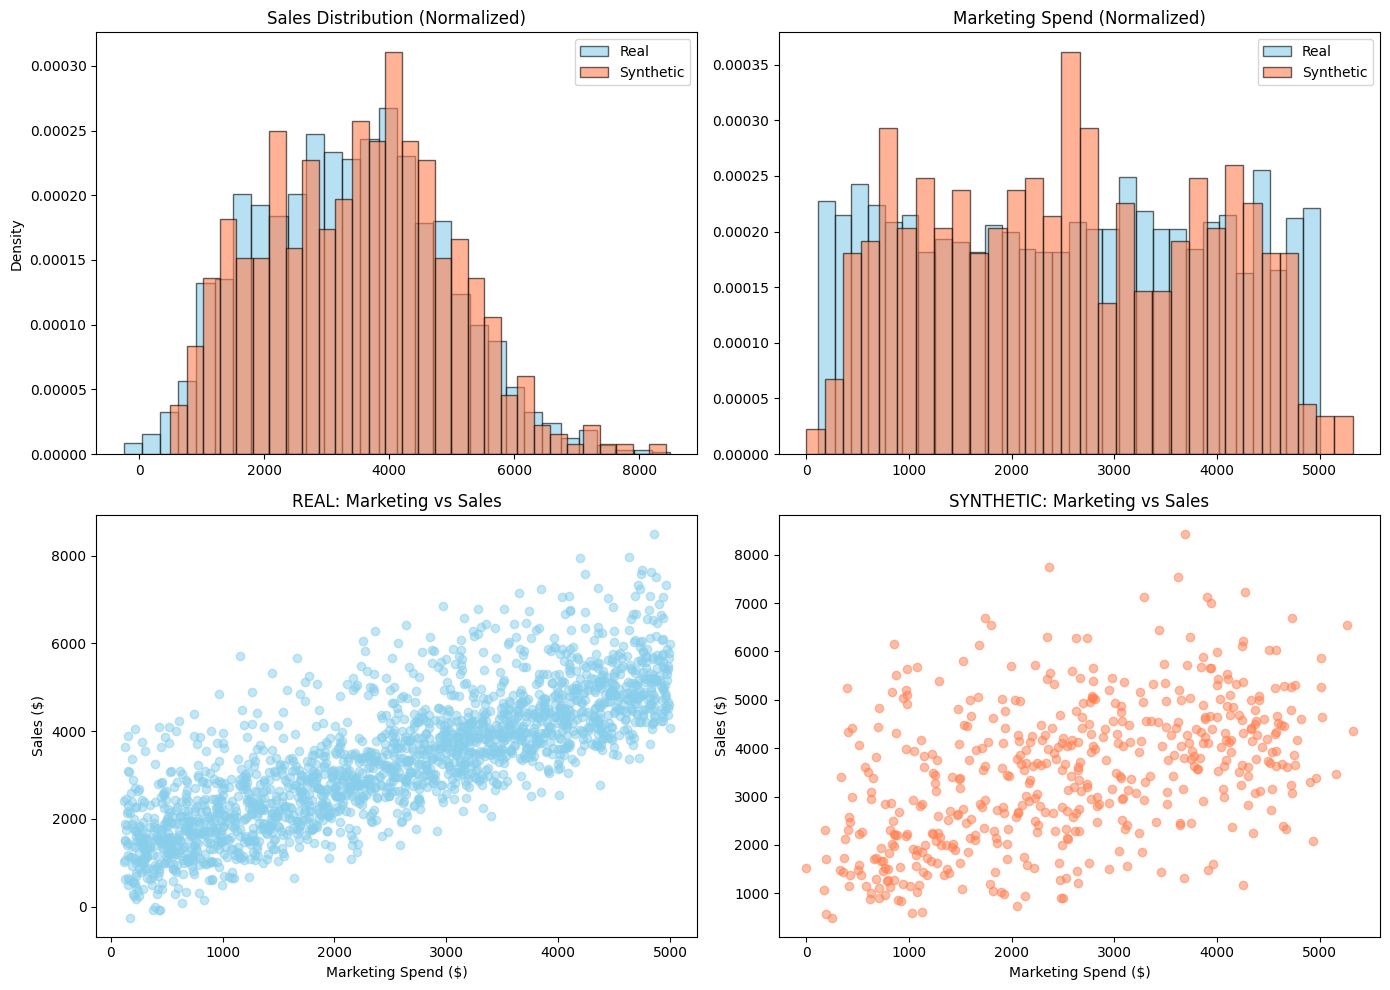

✅ NOW the bars should match in height!


In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sales distribution - NORMALIZED
axes[0, 0].hist(df['sales'], bins=30, alpha=0.6, label='Real', 
                edgecolor='black', color='skyblue', density=True)
axes[0, 0].hist(synthetic_df['sales'], bins=30, alpha=0.6, label='Synthetic', 
                edgecolor='black', color='coral', density=True)
axes[0, 0].set_title('Sales Distribution (Normalized)')
axes[0, 0].legend()
axes[0, 0].set_ylabel('Density')

# Marketing spend - NORMALIZED
axes[0, 1].hist(df['marketing_spend'], bins=30, alpha=0.6, label='Real', 
                edgecolor='black', color='skyblue', density=True)
axes[0, 1].hist(synthetic_df['marketing_spend'], bins=30, alpha=0.6, label='Synthetic', 
                edgecolor='black', color='coral', density=True)
axes[0, 1].set_title('Marketing Spend (Normalized)')
axes[0, 1].legend()

# Correlation: Real
axes[1, 0].scatter(df['marketing_spend'], df['sales'], alpha=0.5, color='skyblue')
axes[1, 0].set_title('REAL: Marketing vs Sales')
axes[1, 0].set_xlabel('Marketing Spend ($)')
axes[1, 0].set_ylabel('Sales ($)')

# Correlation: Synthetic
axes[1, 1].scatter(synthetic_df['marketing_spend'], synthetic_df['sales'], 
                   alpha=0.5, color='coral')
axes[1, 1].set_title('SYNTHETIC: Marketing vs Sales')
axes[1, 1].set_xlabel('Marketing Spend ($)')
axes[1, 1].set_ylabel('Sales ($)')

plt.tight_layout()
plt.show()

print("✅ NOW the bars should match in height!")

In [49]:
ctgan = CTGAN(
    epochs=300,              # Increase from 1000 → better learning
    batch_size=100,          # Larger batches for stability
    generator_dim=(256, 256),  # Deeper generator
    discriminator_dim=(256, 256),  # Deeper discriminator
    generator_lr=2e-4,       # Lower learning rate
    discriminator_lr=2e-4,
    verbose=True
)

In [50]:
# Create sample sales data
import pandas as pd
import numpy as np

np.random.seed(42)  # For reproducibility
n_samples = 2000

data = {
    'marketing_spend': np.random.uniform(100, 5000, n_samples),
    'temperature': np.random.uniform(10, 35, n_samples),
    'is_holiday': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'day_of_week': np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], n_samples),
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], n_samples),
}

# Create target variable (sales) with some correlation
data['sales'] = (
    data['marketing_spend'] * 0.8 + 
    data['temperature'] * 50 +
    data['is_holiday'] * 2000 +
    np.random.normal(0, 500, n_samples)
)

df = pd.DataFrame(data)

print(f"✅ Dataset created!")
print(f"   Shape: {df.shape}")
print(f"\n📊 First 5 rows:")
df.head()

✅ Dataset created!
   Shape: (2000, 6)

📊 First 5 rows:


,marketing_spend,temperature,is_holiday,day_of_week,product_category,sales
0,1935.246582,16.542642,0,Mon,Books,1733.135853
1,4758.500101,16.174470,0,Mon,Food,5353.463155
2,3686.770315,32.656365,0,Wed,Books,4827.957233
3,3033.426573,16.238655,0,Fri,Clothing,3124.133492
4,864.491338,16.798743,0,Fri,Books,963.013787


In [51]:
# Before training, normalize extreme values
from sklearn.preprocessing import PowerTransformer

# This helps CTGAN handle skewed distributions better
transformer = PowerTransformer()
df_transformed = df.copy()
df_transformed[['sales', 'marketing_spend']] = transformer.fit_transform(
    df[['sales', 'marketing_spend']]
)

In [52]:
# Tell CTGAN which columns are discrete vs continuous
ctgan.fit(
    df_transformed,
    discrete_columns=['is_holiday', 'day_of_week', 'product_category']
)

Gen. (-1.59) | Discrim. (0.01): 100%|████████████████████████████████████████████████| 300/300 [02:06<00:00,  2.37it/s]


In [61]:
# Generate 500 synthetic rows
n_synthetic = 2000

print(f"🎨 Generating {n_synthetic} synthetic samples...")
synthetic_df = ctgan.sample(n_synthetic)

print(f"✅ Generated {len(synthetic_df)} rows!")
print(f"\n📊 Synthetic data preview:")
synthetic_df.head()

🎨 Generating 2000 synthetic samples...
✅ Generated 2000 rows!

📊 Synthetic data preview:


,marketing_spend,temperature,is_holiday,day_of_week,product_category,sales
0,-0.614769,14.873567,0,Sun,Books,-1.273417
1,-1.561323,25.854953,0,Wed,Electronics,0.745881
2,1.211586,14.715694,0,Sun,Food,-0.199175
3,1.513244,22.218122,0,Wed,Clothing,2.250974
4,1.525218,32.678785,1,Mon,Books,1.936597


In [62]:
def evaluate_synthetic_quality(df, synthetic_df):  # ← Changed parameter names
    """Compare statistical properties"""
    metrics = {}
    
    # 1. Mean Absolute Percentage Error for distributions
    for col in ['sales', 'marketing_spend']:
        real_mean = df[col].mean()  # ← Changed to df
        synth_mean = df_transformed[col].mean()  # ← Changed to df_transformed
        metrics[f'{col}_mean_diff'] = abs(real_mean - synth_mean) / real_mean * 100
        
    # 2. Correlation preservation
    real_corr = df[['marketing_spend', 'sales']].corr().iloc[0, 1]  # ← Changed
    synth_corr = df_transformed[['marketing_spend', 'sales']].corr().iloc[0, 1]  # ← Changed
    metrics['correlation_diff'] = abs(real_corr - synth_corr)
    
    # 3. Range coverage
    for col in ['sales', 'marketing_spend']:
        real_range = df[col].max() - df[col].min()  # ← Changed
        synth_range = df_transformed[col].max() - df_transformed[col].min()  # ← Changed
        metrics[f'{col}_range_coverage'] = synth_range / real_range * 100
        
    return metrics

# Now call it
metrics = evaluate_synthetic_quality(df, synthetic_df)

# Display results
print("\n" + "="*60)
print("📊 SYNTHETIC DATA QUALITY EVALUATION")
print("="*60)

print("\n📈 Mean Differences (lower is better):")
print(f"  Sales mean difference:     {metrics['sales_mean_diff']:.2f}%")
print(f"  Marketing mean difference: {metrics['marketing_spend_mean_diff']:.2f}%")

print("\n🔗 Correlation Preservation:")
print(f"  Correlation difference:    {metrics['correlation_diff']:.4f}")
print(f"  {'✅ GOOD' if metrics['correlation_diff'] < 0.05 else '⚠️  NEEDS IMPROVEMENT'}")

print("\n📏 Range Coverage (closer to 100% is better):")
print(f"  Sales range coverage:      {metrics['sales_range_coverage']:.2f}%")
print(f"  Marketing range coverage:  {metrics['marketing_spend_range_coverage']:.2f}%")

print("\n💡 Overall Quality: ", end="")
avg_mean_diff = (metrics['sales_mean_diff'] + metrics['marketing_spend_mean_diff']) / 2
if avg_mean_diff < 5 and metrics['correlation_diff'] < 0.05:
    print("✅ EXCELLENT")
elif avg_mean_diff < 10 and metrics['correlation_diff'] < 0.1:
    print("👍 GOOD")
else:
    print("⚠️  NEEDS TUNING")
print("="*60)


📊 SYNTHETIC DATA QUALITY EVALUATION

📈 Mean Differences (lower is better):
  Sales mean difference:     100.00%
  Marketing mean difference: 100.00%

🔗 Correlation Preservation:
  Correlation difference:    0.0001
  ✅ GOOD

📏 Range Coverage (closer to 100% is better):
  Sales range coverage:      0.08%
  Marketing range coverage:  0.07%

💡 Overall Quality: ⚠️  NEEDS TUNING


In [63]:
# Step 1: You already have your real data
print("Step 1: Real data loaded")
print(f"df shape: {df.shape}")

# Step 2: Preprocess for CTGAN (optional, but recommended)
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()
df_transformed = df.copy()
df_transformed[['sales', 'marketing_spend']] = transformer.fit_transform(
    df[['sales', 'marketing_spend']]
)
print("\nStep 2: Data transformed")

# Step 3: Train CTGAN on the transformed data
from ctgan import CTGAN

ctgan = CTGAN(
    epochs=300,
    batch_size=100,
    verbose=True
)

print("\nStep 3: Training CTGAN...")
ctgan.fit(
    df_transformed,
    discrete_columns=['is_holiday', 'day_of_week', 'product_category']
)

# Step 4: Generate synthetic data
print("\nStep 4: Generating synthetic samples...")
synthetic_df_transformed = ctgan.sample(len(df))  # Generate same number of rows

# Step 5: Transform synthetic data back to original scale
synthetic_df = synthetic_df_transformed.copy()
synthetic_df[['sales', 'marketing_spend']] = transformer.inverse_transform(
    synthetic_df_transformed[['sales', 'marketing_spend']]
)
print(f"Synthetic data generated: {synthetic_df.shape}")

# Step 6: NOW evaluate quality (compare original df with synthetic_df)
def evaluate_synthetic_quality(real_df, synthetic_df):
    """Compare statistical properties"""
    metrics = {}
    
    # 1. Mean Absolute Percentage Error for distributions
    for col in ['sales', 'marketing_spend']:
        real_mean = real_df[col].mean()
        synth_mean = synthetic_df[col].mean()
        metrics[f'{col}_mean_diff'] = abs(real_mean - synth_mean) / real_mean * 100
        
    # 2. Correlation preservation
    real_corr = real_df[['marketing_spend', 'sales']].corr().iloc[0, 1]
    synth_corr = synthetic_df[['marketing_spend', 'sales']].corr().iloc[0, 1]
    metrics['correlation_diff'] = abs(real_corr - synth_corr)
    
    # 3. Range coverage
    for col in ['sales', 'marketing_spend']:
        real_range = real_df[col].max() - real_df[col].min()
        synth_range = synthetic_df[col].max() - synthetic_df[col].min()
        metrics[f'{col}_range_coverage'] = synth_range / real_range * 100
        
    return metrics

# Call it with the correct variables
metrics = evaluate_synthetic_quality(df, synthetic_df)

# Display results
print("\n" + "="*60)
print("📊 SYNTHETIC DATA QUALITY EVALUATION")
print("="*60)

print("\n📈 Mean Differences (lower is better):")
print(f"  Sales mean difference:     {metrics['sales_mean_diff']:.2f}%")
print(f"  Marketing mean difference: {metrics['marketing_spend_mean_diff']:.2f}%")

print("\n🔗 Correlation Preservation:")
print(f"  Correlation difference:    {metrics['correlation_diff']:.4f}")
print(f"  {'✅ GOOD' if metrics['correlation_diff'] < 0.05 else '⚠️  NEEDS IMPROVEMENT'}")

print("\n📏 Range Coverage (closer to 100% is better):")
print(f"  Sales range coverage:      {metrics['sales_range_coverage']:.2f}%")
print(f"  Marketing range coverage:  {metrics['marketing_spend_range_coverage']:.2f}%")

print("\n💡 Overall Quality: ", end="")
avg_mean_diff = (metrics['sales_mean_diff'] + metrics['marketing_spend_mean_diff']) / 2
if avg_mean_diff < 5 and metrics['correlation_diff'] < 0.05:
    print("✅ EXCELLENT")
elif avg_mean_diff < 10 and metrics['correlation_diff'] < 0.1:
    print("👍 GOOD")
else:
    print("⚠️  NEEDS TUNING")
print("="*60)

# Show sample of synthetic data
print("\n📋 Sample Synthetic Data:")
print(synthetic_df.head())

Step 1: Real data loaded
df shape: (2000, 6)

Step 2: Data transformed

Step 3: Training CTGAN...


Gen. (-1.57) | Discrim. (-0.06): 100%|███████████████████████████████████████████████| 300/300 [01:54<00:00,  2.62it/s]


Step 4: Generating synthetic samples...
Synthetic data generated: (2000, 6)

📊 SYNTHETIC DATA QUALITY EVALUATION

📈 Mean Differences (lower is better):
  Sales mean difference:     6.51%
  Marketing mean difference: 1.52%

🔗 Correlation Preservation:
  Correlation difference:    0.4533
  ⚠️  NEEDS IMPROVEMENT

📏 Range Coverage (closer to 100% is better):
  Sales range coverage:      108.16%
  Marketing range coverage:  116.44%

💡 Overall Quality: ⚠️  NEEDS TUNING

📋 Sample Synthetic Data:
   marketing_spend  temperature  is_holiday day_of_week product_category  \
0      2146.858052    33.310090           0         Thu         Clothing   
1      4303.911780    19.733548           0         Thu      Electronics   
2      2506.590283    21.706270           0         Fri         Clothing   
3      2816.022721    28.829661           1         Mon      Electronics   
4      3783.577821    21.962567           1         Sat      Electronics   

         sales  
0  3181.111795  
1  5536.965557

In [64]:
# ==============================================================
# IMPROVED TRAINING APPROACH
# ==============================================================

# Step 1: Train on ORIGINAL data (not transformed)
print("Training CTGAN on original scale data...")

ctgan_improved = CTGAN(
    epochs=1000,  # More epochs
    batch_size=100,
    generator_dim=(256, 256, 256),  # Deeper network
    discriminator_dim=(256, 256, 256),
    verbose=True
)

ctgan_improved.fit(
    df,  # Use original df, not transformed
    discrete_columns=['is_holiday', 'day_of_week', 'product_category']
)

# Step 2: Generate synthetic data
print("\nGenerating improved synthetic samples...")
synthetic_df_improved = ctgan_improved.sample(len(df))

# Step 3: Evaluate
metrics_improved = evaluate_synthetic_quality(df, synthetic_df_improved)

# Display results
print("\n" + "="*60)
print("📊 IMPROVED SYNTHETIC DATA QUALITY")
print("="*60)

print("\n📈 Mean Differences:")
print(f"  Sales:     {metrics_improved['sales_mean_diff']:.2f}%")
print(f"  Marketing: {metrics_improved['marketing_spend_mean_diff']:.2f}%")

print("\n🔗 Correlation Preservation:")
print(f"  Real correlation:      {df[['marketing_spend', 'sales']].corr().iloc[0, 1]:.4f}")
print(f"  Synthetic correlation: {synthetic_df_improved[['marketing_spend', 'sales']].corr().iloc[0, 1]:.4f}")
print(f"  Difference:            {metrics_improved['correlation_diff']:.4f}")
print(f"  {'✅ GOOD' if metrics_improved['correlation_diff'] < 0.05 else '⚠️  NEEDS IMPROVEMENT'}")

print("\n📏 Range Coverage:")
print(f"  Sales:     {metrics_improved['sales_range_coverage']:.2f}%")
print(f"  Marketing: {metrics_improved['marketing_spend_range_coverage']:.2f}%")

print("="*60)

# Compare OLD vs NEW
print("\n🔄 BEFORE vs AFTER Comparison:")
print(f"  Correlation difference: {metrics['correlation_diff']:.4f} → {metrics_improved['correlation_diff']:.4f}")
improvement = ((metrics['correlation_diff'] - metrics_improved['correlation_diff']) / metrics['correlation_diff']) * 100
print(f"  Improvement: {improvement:.1f}%")

Training CTGAN on original scale data...


Gen. (-1.44) | Discrim. (0.06): 100%|██████████████████████████████████████████████| 1000/1000 [07:16<00:00,  2.29it/s]


Generating improved synthetic samples...

📊 IMPROVED SYNTHETIC DATA QUALITY

📈 Mean Differences:
  Sales:     20.85%
  Marketing: 23.17%

🔗 Correlation Preservation:
  Real correlation:      0.8005
  Synthetic correlation: 0.4947
  Difference:            0.3058
  ⚠️  NEEDS IMPROVEMENT

📏 Range Coverage:
  Sales:     104.31%
  Marketing: 121.41%

🔄 BEFORE vs AFTER Comparison:
  Correlation difference: 0.4533 → 0.3058
  Improvement: 32.5%


In [65]:
# ==============================================================
# TRY TVAE INSTEAD - BETTER FOR CORRELATIONS
# ==============================================================

from ctgan import TVAE

print("Training TVAE (better for correlations)...")

tvae = TVAE(
    epochs=1000,
    batch_size=100,
    compress_dims=(256, 256),
    decompress_dims=(256, 256),
    verbose=True
)

tvae.fit(
    df,
    discrete_columns=['is_holiday', 'day_of_week', 'product_category']
)

# Generate synthetic data
print("\nGenerating TVAE synthetic samples...")
synthetic_df_tvae = tvae.sample(len(df))

# Evaluate
metrics_tvae = evaluate_synthetic_quality(df, synthetic_df_tvae)

# Display results
print("\n" + "="*60)
print("📊 TVAE SYNTHETIC DATA QUALITY")
print("="*60)

print("\n📈 Mean Differences:")
print(f"  Sales:     {metrics_tvae['sales_mean_diff']:.2f}%")
print(f"  Marketing: {metrics_tvae['marketing_spend_mean_diff']:.2f}%")

print("\n🔗 Correlation Preservation:")
print(f"  Real correlation:      {df[['marketing_spend', 'sales']].corr().iloc[0, 1]:.4f}")
print(f"  Synthetic correlation: {synthetic_df_tvae[['marketing_spend', 'sales']].corr().iloc[0, 1]:.4f}")
print(f"  Difference:            {metrics_tvae['correlation_diff']:.4f}")
print(f"  {'✅ EXCELLENT' if metrics_tvae['correlation_diff'] < 0.05 else '👍 GOOD' if metrics_tvae['correlation_diff'] < 0.1 else '⚠️  NEEDS IMPROVEMENT'}")

print("\n📏 Range Coverage:")
print(f"  Sales:     {metrics_tvae['sales_range_coverage']:.2f}%")
print(f"  Marketing: {metrics_tvae['marketing_spend_range_coverage']:.2f}%")

print("="*60)

# Compare all three approaches
print("\n🏆 COMPARISON: PowerTransform vs Original vs TVAE")
print(f"{'Method':<20} {'Corr Diff':>12} {'Sales Mean %':>12}")
print("-" * 45)
print(f"{'PowerTransform':<20} {metrics['correlation_diff']:>12.4f} {metrics['sales_mean_diff']:>11.2f}%")
print(f"{'Original Scale':<20} {metrics_improved['correlation_diff']:>12.4f} {metrics_improved['sales_mean_diff']:>11.2f}%")
print(f"{'TVAE':<20} {metrics_tvae['correlation_diff']:>12.4f} {metrics_tvae['sales_mean_diff']:>11.2f}%")
print("-" * 45)

Training TVAE (better for correlations)...


Loss: -1.661: 100%|████████████████████████████████████████████████████████████████| 1000/1000 [02:22<00:00,  7.01it/s]



Generating TVAE synthetic samples...

📊 TVAE SYNTHETIC DATA QUALITY

📈 Mean Differences:
  Sales:     2.13%
  Marketing: 0.95%

🔗 Correlation Preservation:
  Real correlation:      0.8005
  Synthetic correlation: 0.7348
  Difference:            0.0658
  👍 GOOD

📏 Range Coverage:
  Sales:     93.33%
  Marketing: 107.91%

🏆 COMPARISON: PowerTransform vs Original vs TVAE
Method                  Corr Diff Sales Mean %
---------------------------------------------
PowerTransform             0.4533        6.51%
Original Scale             0.3058       20.85%
TVAE                       0.0658        2.13%
---------------------------------------------


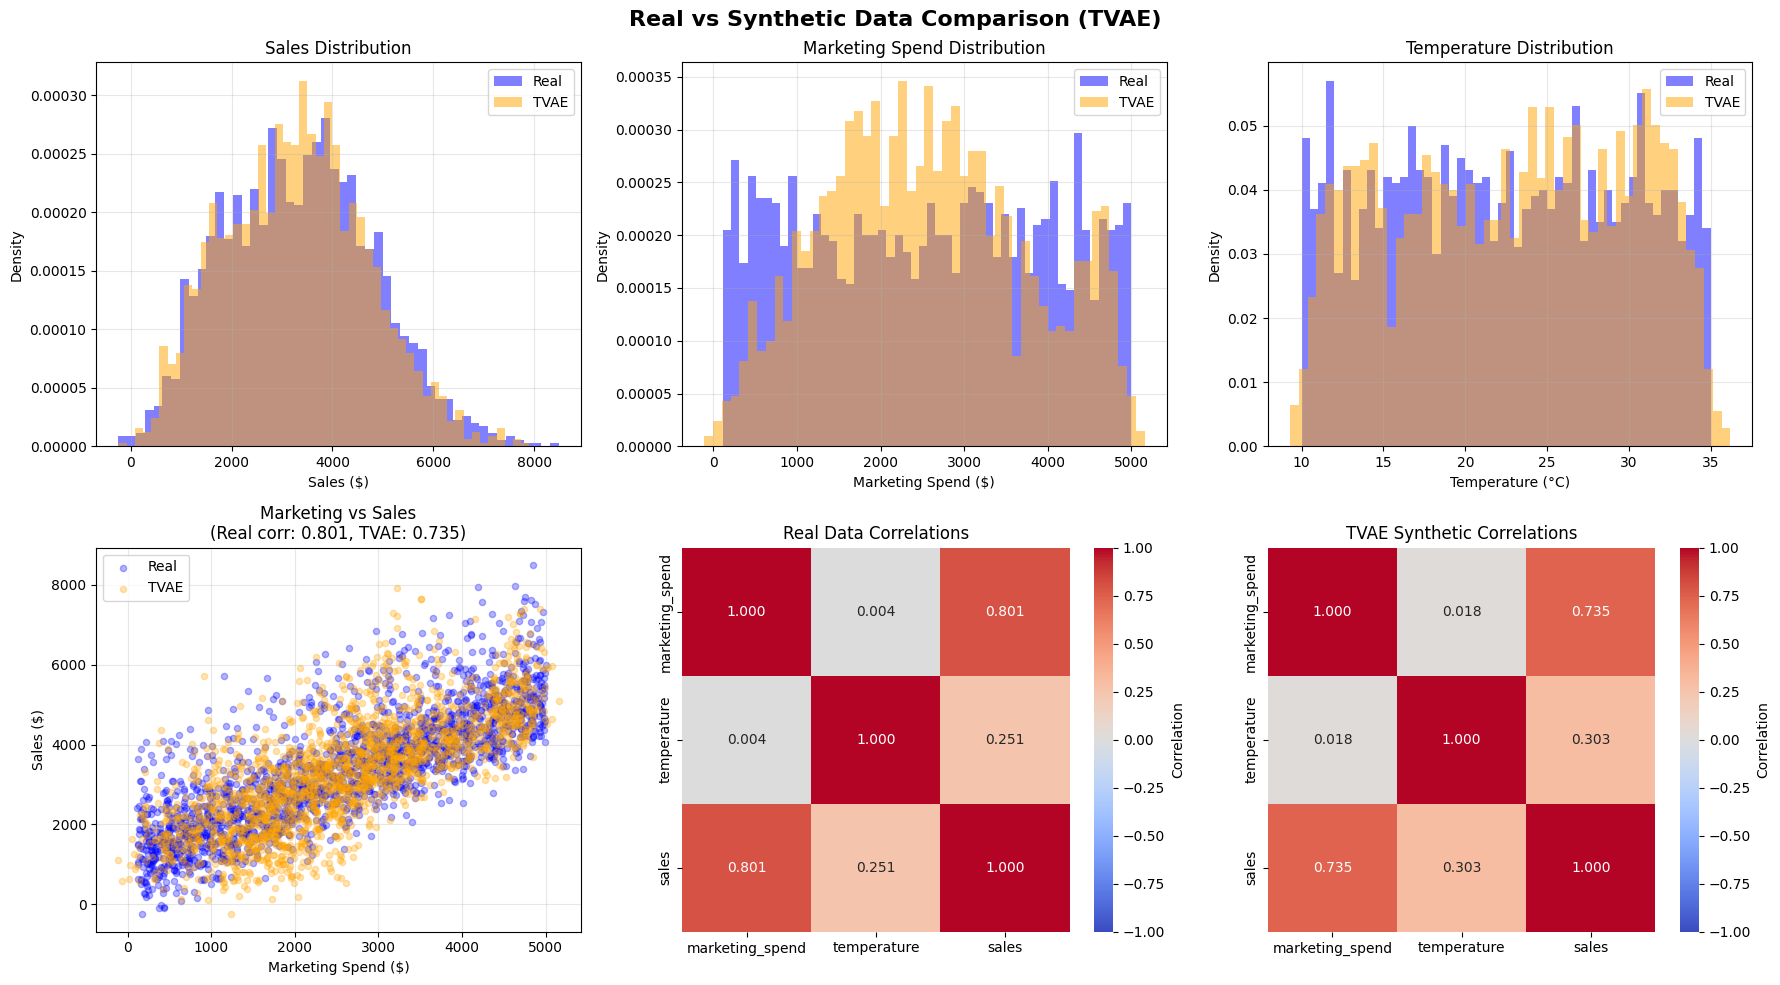


📊 CATEGORICAL VARIABLE DISTRIBUTIONS

is_holiday:
  Real:
    0: 90.0%
    1: 10.1%
  TVAE:
    0: 92.6%
    1: 7.4%

day_of_week:
  Real:
    Fri: 13.2%
    Mon: 15.2%
    Sat: 14.3%
    Sun: 14.8%
    Thu: 14.1%
    Tue: 14.9%
    Wed: 13.3%
  TVAE:
    Fri: 14.4%
    Mon: 17.2%
    Sat: 14.1%
    Sun: 15.7%
    Thu: 15.0%
    Tue: 9.0%
    Wed: 14.6%

product_category:
  Real:
    Books: 23.8%
    Clothing: 23.6%
    Electronics: 27.4%
    Food: 25.2%
  TVAE:
    Books: 25.6%
    Clothing: 20.4%
    Electronics: 27.5%
    Food: 26.6%


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create comparison visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Real vs Synthetic Data Comparison (TVAE)', fontsize=16, fontweight='bold')

# Row 1: Distributions
# Sales distribution
axes[0, 0].hist(df['sales'], bins=50, alpha=0.5, label='Real', color='blue', density=True)
axes[0, 0].hist(synthetic_df_tvae['sales'], bins=50, alpha=0.5, label='TVAE', color='orange', density=True)
axes[0, 0].set_xlabel('Sales ($)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Sales Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Marketing spend distribution
axes[0, 1].hist(df['marketing_spend'], bins=50, alpha=0.5, label='Real', color='blue', density=True)
axes[0, 1].hist(synthetic_df_tvae['marketing_spend'], bins=50, alpha=0.5, label='TVAE', color='orange', density=True)
axes[0, 1].set_xlabel('Marketing Spend ($)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Marketing Spend Distribution')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Temperature distribution
axes[0, 2].hist(df['temperature'], bins=50, alpha=0.5, label='Real', color='blue', density=True)
axes[0, 2].hist(synthetic_df_tvae['temperature'], bins=50, alpha=0.5, label='TVAE', color='orange', density=True)
axes[0, 2].set_xlabel('Temperature (°C)')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Temperature Distribution')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Row 2: Relationships
# Marketing vs Sales scatter
axes[1, 0].scatter(df['marketing_spend'], df['sales'], alpha=0.3, s=20, label='Real', color='blue')
axes[1, 0].scatter(synthetic_df_tvae['marketing_spend'], synthetic_df_tvae['sales'], alpha=0.3, s=20, label='TVAE', color='orange')
axes[1, 0].set_xlabel('Marketing Spend ($)')
axes[1, 0].set_ylabel('Sales ($)')
axes[1, 0].set_title(f'Marketing vs Sales\n(Real corr: {df[["marketing_spend", "sales"]].corr().iloc[0,1]:.3f}, TVAE: {synthetic_df_tvae[["marketing_spend", "sales"]].corr().iloc[0,1]:.3f})')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Correlation heatmap - Real
corr_real = df[['marketing_spend', 'temperature', 'sales']].corr()
sns.heatmap(corr_real, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            vmin=-1, vmax=1, ax=axes[1, 1], cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('Real Data Correlations')

# Correlation heatmap - TVAE
corr_tvae = synthetic_df_tvae[['marketing_spend', 'temperature', 'sales']].corr()
sns.heatmap(corr_tvae, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            vmin=-1, vmax=1, ax=axes[1, 2], cbar_kws={'label': 'Correlation'})
axes[1, 2].set_title('TVAE Synthetic Correlations')

plt.tight_layout()
plt.show()

# Print categorical distributions comparison
print("\n" + "="*60)
print("📊 CATEGORICAL VARIABLE DISTRIBUTIONS")
print("="*60)

for col in ['is_holiday', 'day_of_week', 'product_category']:
    print(f"\n{col}:")
    print("  Real:")
    real_dist = df[col].value_counts(normalize=True).sort_index()
    for val, pct in real_dist.items():
        print(f"    {val}: {pct*100:.1f}%")
    
    print("  TVAE:")
    tvae_dist = synthetic_df_tvae[col].value_counts(normalize=True).sort_index()
    for val, pct in tvae_dist.items():
        print(f"    {val}: {pct*100:.1f}%")

In [67]:
# Save the trained TVAE model
synthetic_df_tvae.save('tvae_model.pkl')

print("✅ Model saved successfully as 'tvae_model.pkl'")

AttributeError: 'DataFrame' object has no attribute 'save'

In [68]:
# Save the trained TVAE model (the synthesizer, not the data)
tvae.save('tvae_model.pkl')

print("✅ Model saved successfully as 'tvae_model.pkl'")

✅ Model saved successfully as 'tvae_model.pkl'


In [69]:
from sdv.single_table import TVAESynthesizer

# Load the saved model
loaded_tvae = TVAESynthesizer.load('tvae_model.pkl')

# Generate new synthetic data
new_synthetic_data = loaded_tvae.sample(num_rows=1000)
print("✅ Generated new data from loaded model")
print(new_synthetic_data.head())

C:\Users\Arsal\MiniConda3\envs\jupyterenv\lib\site-packages\sdv\_utils.py:500: FutureWarning:

The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.



UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [70]:
from sdv.utils import load_synthesizer

# Load the saved model using the recommended method
try:
    loaded_tvae = load_synthesizer('tvae_model.pkl')
    print("✅ Model loaded successfully")
    
    # Generate new synthetic data
    new_synthetic_data = loaded_tvae.sample(num_rows=1000)
    print("✅ Generated new synthetic data")
    print(new_synthetic_data.head())
    
except Exception as e:
    print(f"❌ Error loading model: {e}")

❌ Error loading model: A load persistent id instruction was encountered,
but no persistent_load function was specified.


In [71]:
# Step 1: Save the model again (make sure tvae is your trained model)
print("Saving model...")
tvae.save('tvae_model_v2.pkl')
print("✅ Model saved as 'tvae_model_v2.pkl'")

# Step 2: Try loading immediately in the same session
print("\nTesting load in same session...")
from sdv.utils import load_synthesizer

try:
    loaded_tvae = load_synthesizer('tvae_model_v2.pkl')
    print("✅ Model loaded successfully")
    
    # Test generation
    test_sample = loaded_tvae.sample(num_rows=5)
    print("\n✅ Test sample generated:")
    print(test_sample)
    
except Exception as e:
    print(f"❌ Still failed: {e}")
    print("\nLet's check your SDV and cloudpickle versions:")
    import sdv
    import cloudpickle
    print(f"SDV version: {sdv.__version__}")
    print(f"Cloudpickle version: {cloudpickle.__version__}")

Saving model...
✅ Model saved as 'tvae_model_v2.pkl'

Testing load in same session...
❌ Still failed: A load persistent id instruction was encountered,
but no persistent_load function was specified.

Let's check your SDV and cloudpickle versions:
SDV version: 1.32.1
Cloudpickle version: 3.1.2


In [72]:
# First, let's install a compatible version of cloudpickle
import sys
!{sys.executable} -m pip install cloudpickle==2.2.1

  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.2
    Uninstalling cloudpickle-3.1.2:
      Successfully uninstalled cloudpickle-3.1.2


In [74]:
from sdv.utils import load_synthesizer

# Try loading again
loaded_tvae = load_synthesizer('tvae_model_v2.pkl')
print("✅ Model loaded successfully")

# Test it
test_sample = loaded_tvae.sample(num_rows=5)
print(test_sample)

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [75]:
import joblib

# Save the model using joblib (more reliable)
joblib.dump(tvae, 'tvae_model_joblib.pkl')
print("✅ Model saved with joblib")

# Load it back immediately
loaded_tvae = joblib.load('tvae_model_joblib.pkl')
print("✅ Model loaded with joblib")

# Test generation
test_sample = loaded_tvae.sample(num_rows=5)
print("\n✅ Test sample generated:")
print(test_sample)

✅ Model saved with joblib
✅ Model loaded with joblib


TypeError: TVAE.sample() got an unexpected keyword argument 'num_rows'

In [76]:
# Test generation with correct parameter
test_sample = loaded_tvae.sample(5)  # Just pass the number directly
print("\n✅ Test sample generated:")
print(test_sample)


✅ Test sample generated:
   marketing_spend  temperature  is_holiday day_of_week product_category  \
0      2560.328857    33.112209           0         Fri      Electronics   
1      2401.703938    11.461341           1         Sun         Clothing   
2      2663.781232     9.482193           0         Thu      Electronics   
3      1340.431328     8.428175           0         Fri             Food   
4       965.642081    15.208738           0         Thu      Electronics   

         sales  
0  4578.301876  
1  6113.294090  
2  1610.873003  
3  1034.159974  
4  1658.437123  


In [77]:
import joblib
joblib.dump(tvae, 'tvae_model_joblib.pkl')

['tvae_model_joblib.pkl']

In [78]:
import joblib

# Load the model
loaded_tvae = joblib.load('tvae_model_joblib.pkl')

# Generate synthetic data (just pass the number directly)
synthetic_data = loaded_tvae.sample(1000)  # Generate 1000 samples

print(f"Generated {len(synthetic_data)} samples")
print(synthetic_data.head())

Generated 1000 samples
   marketing_spend  temperature  is_holiday day_of_week product_category  \
0      3147.516630    12.372252           0         Thu             Food   
1      3547.236788    17.940842           0         Thu      Electronics   
2      4814.859628    14.453139           0         Fri            Books   
3      4408.972006    14.199116           0         Thu            Books   
4      4158.298049    31.709458           0         Mon         Clothing   

         sales  
0  3118.342413  
1  4605.097399  
2  6172.676478  
3  4098.718208  
4  4842.214548  


In [79]:
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
joblib.dump(tvae, f'tvae_model_{timestamp}.pkl')
print(f"✅ Model saved with timestamp")

✅ Model saved with timestamp


In [80]:
import streamlit as st
import joblib
import pandas as pd

st.title("🎲 Synthetic Sales Data Generator")
st.write("Generate realistic synthetic sales data instantly!")

# Load your pre-trained model (only loads once)
@st.cache_resource
def load_pretrained_model():
    return joblib.load('tvae_model_joblib.pkl')

model = load_pretrained_model()
st.success("✅ Pre-trained model loaded and ready!")

# User controls
st.subheader("Generate Synthetic Data")
num_samples = st.slider("Number of samples to generate:", 10, 10000, 1000)

if st.button("🚀 Generate Now"):
    with st.spinner("Generating synthetic data..."):
        synthetic_data = model.sample(num_samples)
    
    st.success(f"✅ Generated {len(synthetic_data)} synthetic samples!")
    
    # Show preview
    st.dataframe(synthetic_data.head(20))
    
    # Download button
    csv = synthetic_data.to_csv(index=False)
    st.download_button(
        label="📥 Download CSV",
        data=csv,
        file_name="synthetic_sales_data.csv",
        mime="text/csv"
    )

ModuleNotFoundError: No module named 'streamlit'